# EDA part 2 Studio

## Further Analysis of IMDB movies

In this studio, we're returning to this [tutorial](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) as a reference guide for our EDA.
You've seen the data set before and you've worked through similar kinds of questions with the heart disease dataset. 

Blocks have been created for your code and we've asked you to add more in some places.

The dataset from [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data)

### 1. Find the relative proportions of movie genres represented.

In [16]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create your data variabe using .read_csv 

data = pd.read_csv('IMDB-Movie-Data.csv')

# get reaquainted with the data by viewing the first 5 rows

data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
# list the column names

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
# preview the contents of the 'Genre' column only

data.loc[:,"Genre"]

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [17]:
# using the .value_counts() method, explore the number of each genre type in the series
# assign the result to a variable called genre_counts

genre_counts = data[["Genre"]].value_counts()
print(genre_counts)

Genre                    
Action,Adventure,Sci-Fi      50
Drama                        48
Comedy,Drama,Romance         35
Comedy                       32
Drama,Romance                31
                             ..
Animation,Comedy,Drama        1
Animation,Action,Comedy       1
Adventure,Horror,Mystery      1
Adventure,Fantasy,Mystery     1
Thriller,War                  1
Length: 207, dtype: int64


In [19]:
# Find the proportions of each genre by dividing your variable assigned above by the sum of 
# all of the unique genre values
# assign this to the variable genre_proportions
genre_proportions = genre_counts/genre_counts.sum()
print(genre_proportions)

Genre                    
Action,Adventure,Sci-Fi      0.050
Drama                        0.048
Comedy,Drama,Romance         0.035
Comedy                       0.032
Drama,Romance                0.031
                             ...  
Animation,Comedy,Drama       0.001
Animation,Action,Comedy      0.001
Adventure,Horror,Mystery     0.001
Adventure,Fantasy,Mystery    0.001
Thriller,War                 0.001
Length: 207, dtype: float64


In [20]:
# the length of results a above is too long to know if there are any null values present
# we can run .isna() on the series and collect the sum to check if there are missing values
# uncomment the line below to see the results
(data['Genre'].isna().sum())


0

In [22]:
# use .head() on genre_proportions to get a better look at the top 20 
# remember: .head() can take a parameter to display more than 5 entries 
genre_proportions.head(20)

Genre                     
Action,Adventure,Sci-Fi       0.050
Drama                         0.048
Comedy,Drama,Romance          0.035
Comedy                        0.032
Drama,Romance                 0.031
Action,Adventure,Fantasy      0.027
Comedy,Drama                  0.027
Animation,Adventure,Comedy    0.027
Comedy,Romance                0.026
Crime,Drama,Thriller          0.024
Crime,Drama,Mystery           0.023
Action,Adventure,Drama        0.018
Action,Crime,Drama            0.017
Horror,Thriller               0.016
Drama,Thriller                0.015
Biography,Drama               0.014
Action,Adventure,Comedy       0.014
Adventure,Family,Fantasy      0.014
Biography,Drama,History       0.014
Action,Comedy,Crime           0.012
dtype: float64

### 2. Find the minimum, maximum, average, and standard deviation of revenue data.

In [23]:
# use .describe() on the revenue column to see some summary statistics of the revenue data present
data[["Revenue (Millions)"]].describe()

,Revenue (Millions)
count,872.000000
mean,82.956376
std,103.253540
min,0.000000
25%,13.270000
50%,47.985000
75%,113.715000
max,936.630000


Do we have any missing revenue entries?
Add a new code cell below this and use ``.isna()`` on the column to check.
Ask yourself: does this affect the results of ``.describe()``?
Hint: look at the count result above and compare that with the ``Length`` returned with ``.isna()``

In [24]:
data[["Revenue (Millions)"]].isna()

,Revenue (Millions)
0,False
1,False
2,False
3,False
4,False
...,...
995,True
996,False
997,False
998,True


### 3. Make a plot distribution of the revenue data.


<Axes: xlabel='Revenue (Millions)', ylabel='Count'>

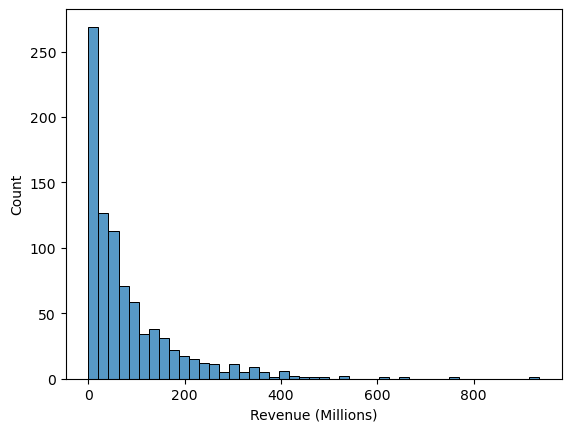

In [27]:
# use sns.histplot to get a birds eye view of the revenue distribution
# Note: the refernce article plots Cholesterol data with ``distplot`` but we recieve 
# a deprecation warning so we've switched it with ``histplot``. The resulting graph is 
# virtually the same.
sns.histplot(data["Revenue (Millions)"])

Look back at your ``.describe()`` results above. Does this plotted distribution match the results of the 25%, 50%, and 75% percentile data?

Create another code cell below this and make another histplot but with only the top 20 items in the revenue column. Run ``.describe()`` on the top 20 to again check the percentile distributions with what the graph displays.

,Revenue (Millions)
count,20.000000
mean,172.067000
std,140.548094
min,2.870000
25%,63.262500
50%,144.590000
75%,254.142500
max,532.170000


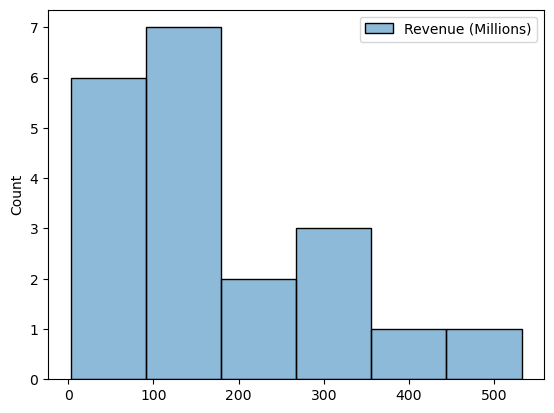

In [30]:
sns.histplot(data.iloc[0:21][['Revenue (Millions)']])
(data.iloc[0:21][['Revenue (Millions)']]).describe()

### 4. Find the % of movies with a higher than avergage Rating

In [31]:
# create a variable called mean_rating.
# assign mean_rating the result of running ``.mean()`` on the rating column.

mean_rating = data[["Rating"]].mean()
print(mean_rating)


Rating    6.7232
dtype: float64


In [ ]:
# Find the dataset where a movie's rating is higher than mean_rating. 
# Divide that by the length of the total dataset.

len(data[["Rating"]] > mean_rating)/len(data)

### 5. Plot the rating data against genre to observe the difference in score in different movie types

In [32]:
# run describe on the rating column

data[["Rating"]].describe()

,Rating
count,1000.000000
mean,6.723200
std,0.945429
min,1.900000
25%,6.200000
50%,6.800000
75%,7.400000
max,9.000000


<Axes: xlabel='Rating', ylabel='Genre'>

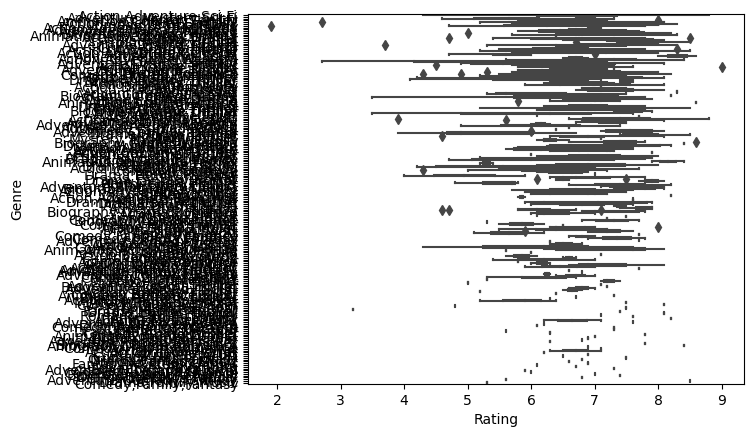

In [46]:
# Plot the rating data against genres
# First, lets mirror what our reference article plots

sns.boxplot(x = "Rating", y = "Genre", data=data)


That graph isn't very helpful! 
Create a new code cell below this and create the same plot, but this time for data used,
use only the first 20 entries.
Do you find that any easier to read and interpret?
Next, create one more cell. Use the same axes and the top 20 items in the data, but plot using ``sns.scatterplot()``. Do you learn anything different between the boxplot and the scatterplot?

<Axes: xlabel='Rating', ylabel='Genre'>

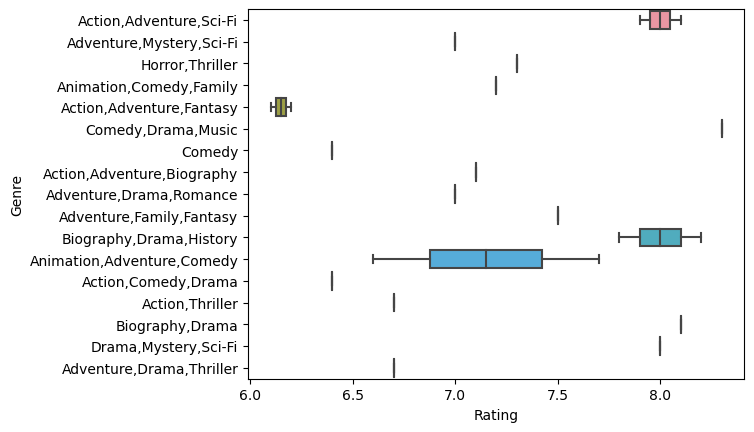

In [49]:
sns.boxplot(x = "Rating", y = "Genre", data=data.iloc[0:21])

<Axes: xlabel='Rating', ylabel='Genre'>

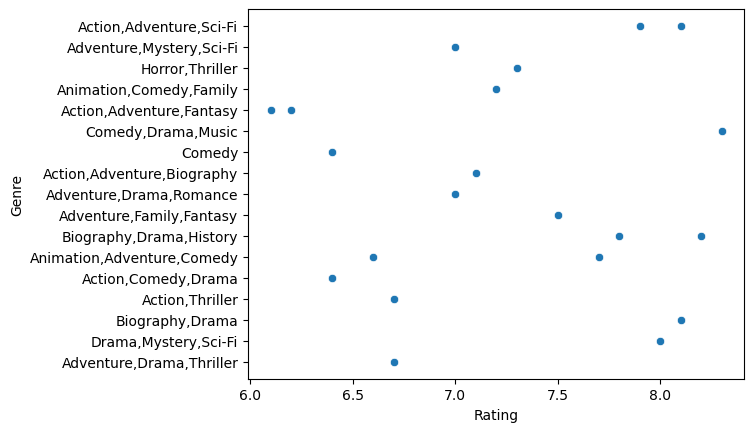

In [50]:
sns.scatterplot(x = "Rating", y = "Genre", data=data.iloc[0:21])

### 6. Make a chart to show the number of films in each rating group each year

In [90]:
rating_group = data.groupby(['Rating', pd.cut(data.Rating, [1,2,3,4,5,6,7,8, 9,10])])
data.groupby('rating_group')[["Rating"]].count()

,Rating
rating_group,
"(1, 2]",1
"(2, 3]",2
"(3, 4]",9
"(4, 5]",35
"(5, 6]",163
"(6, 7]",391
"(7, 8]",340
"(8, 9]",59
"(9, 10]",0


In [103]:
# Make a chart to show the number of films in each rating group per year
data.groupby(['rating_group','Year'])[["Rating"]].count().unstack()

Rating                                                  
Year           2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
rating_group                                                         
(1, 2]            0    0    1    0    0    0    0    0    0    0    0
(2, 3]            0    0    0    1    0    0    0    0    0    0    1
(3, 4]            0    0    0    0    0    0    0    0    0    1    8
(4, 5]            0    1    1    1    3    2    0    3    0    6   18
(5, 6]            4    4    6    7    7    8    8   10   19   22   68
(6, 7]           18   11   22   16   25   25   27   42   38   56  111
(7, 8]           18   32   19   21   20   24   25   32   31   36   82
(8, 9]            4    5    3    5    5    4    4    4   10    6    9
(9, 10]           0    0    0    0    0    0    0    0    0    0    0

Each year, which rating range(s) is the most concentrated? Does this match your results from the box and scatter plots above?